# Практическая работа №1

### Используемые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import fsolve
from numpy import inf, arange
from numpy.linalg import det

from math import exp, sqrt, pi

### Глобальные переменные

In [2]:
normal_distribution = lambda x, s, m: exp(-0.5 * ((x - m) / s) ** 2) / (s * sqrt(2 * pi))

### Исходные данные:
`data1.json`:
```json
{
    "x": [ 69, 74, 68, 70, 72, 67, 66, 70, 76, 68, 72, 79, 74, 67, 66, 71, 74, 75, 75, 76 ],
    "y": [ 153, 175, 155, 135, 172, 150, 115, 137, 200, 130, 140, 265, 185, 112, 140,  150, 165, 185, 210, 220 ]
}
```
`data2.json`:
```json
{
    "a": [ 17, 17, 12 ],
    "b": [ 11, 9, 13 ],
    "c": [ 11, 8, 19 ]
}
```

## Пункт 1

In [3]:
frame = pd.read_json('data1.json')
print(f"Исходные наборы данных:\n{ frame }")

Исходные наборы данных:
     x    y
0   69  153
1   74  175
2   68  155
3   70  135
4   72  172
5   67  150
6   66  115
7   70  137
8   76  200
9   68  130
10  72  140
11  79  265
12  74  185
13  67  112
14  66  140
15  71  150
16  74  165
17  75  185
18  75  210
19  76  220


#### Среднее значение
##### Среднее значение - это среднее (взвешенное по вероятностям возможных значений) значение случайной величины.
##### Формула:
\begin{equation}
    \mu(x) = \frac{1}{n}\sum^{n}_{i=1}x_i
\end{equation}
,где $x$ - набор значений, $n$ - количество значений в наборе.

In [4]:
print(f"Среднее значение x: { frame['x'].mean() }")

Среднее значение x: 71.45


#### Медиана
##### Медиана - это число, которое находится в середине набора, если его упорядочить по возрастанию.
##### Формула:
\begin{equation}
    med(x) =
    \begin{cases}
        X_{\frac{n}{2}} & \text{если $n$ чётное} \\
        \frac{X_{\frac{n-1}{2}} - X_{\frac{n+1}{2}}}{2} & \text{если $n$ нечётное}
    \end{cases}
\end{equation}
,где $X$ - отсортированный набор значений, $n$ - количество значений в наборе.

In [5]:
print(f"Медиана x: { frame['x'].median() }")

Медиана x: 71.5


#### Мода
##### Мода - значение в наборе данных, которое встречается наиболее часто.

In [6]:
print(f"Мода x: { frame['x'].mode()[0] }")

Мода x: 74


#### Дисперсия
##### Дисперсия - мера разброса значений случайной величины относительно её математического ожидания. Квадратный корень из дисперсии называется среднеквадратическим отклонением.
##### Формула:
\begin{equation}
    D[x] = \frac{\sum^{n}_{i=1}(x_i-\mu)^2}{n}
\end{equation}
, где $x$ - набор данных, $n$ - количество значений в наборе, $\mu$ - среднее значение набора.

In [7]:
print(f"Дисперсия y: { frame['x'].var() }")

Дисперсия y: 14.576315789473687


#### Нормальное распределение
##### Нормальное распределение - это распределение вероятностей которое задается функцией плотности вероятности.
###### Распределение вероятностей - это закон, описывающий область значений случайной величины и соответствующие вероятности появления этих значений.
###### Плотность вероятности - это функция, характеризующая сравнительную вероятность реализации тех или иных значений случайной переменной.
##### Формула:
\begin{equation}
    std(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp(-\frac{(x-2)^2}{2\sigma^2})
\end{equation}
, где $x$ - набор данных, $\sigma$ - cреднеквадратичное отклонение набора, $\mu$ - среднее значение набора.

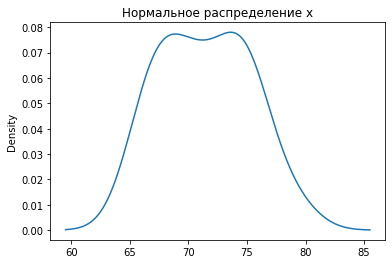

In [8]:
frame['x'].plot.kde()
plt.title("Нормальное распределение х")
plt.show()

Вероятность того, что значение попадет в определенный интервал - интеграл нормального распределения на этом отрезке:

In [9]:
sigma = frame['x'].std()
mu = frame['x'].mean()
integral = quad(lambda x: normal_distribution(x, sigma, mu), 80, +inf)
print(f"Вероятность того, что возраст больше 80, составит: {integral[0]} +/- {integral[1]}")

Вероятность того, что возраст больше 80, составит: 0.012563181452947533 +/- 2.9068309037497502e-11


#### Двумерное математическое ожидание
##### Математическое ожидание случайного вектора - это вектор из математических ожиданий компонент вектора.

In [10]:
print(f"Двумерное математическое ожидание: { frame['x'].mean(), frame['y'].mean() }")

Двумерное математическое ожидание: (71.45, 164.7)


#### Ковариационная матрица
##### Ковариационная матрица — квадратная симметрическая неотрицательно определенная матрица, на диагонали которой располагаются дисперсии компонент вектора, а внедиагональные элементы — ковариации между компонентами.
##### Формула:
\begin{equation}
    H(x, y) =
    \begin{bmatrix}
        D[x] & cov(x, y) \\
        cov(x, y) & D[y]
    \end{bmatrix}
\end{equation}
, где $x$, $y$ - наборы данных, $cov$ - ковариация наборов.

#### Ковариация
##### Ковариация — мера линейной зависимости двух случайных величин.
##### Формула:
\begin{equation}
    cov(x, y) = \frac{\sum^{n}_{i=1}(x_i - \mu(x))(y_i - \mu(y))}{n - 1}
\end{equation}
, где $x$, $y$ - наборы данных, $n$ - количество значений в наборе, $\mu$ - среднее значение набора.

In [11]:
print(f"Ковариационная матрица:\n{ frame.cov() }\n")

Ковариационная матрица:
            x            y
x   14.576316   128.878947
y  128.878947  1441.273684



#### Корреляция
##### Корреляция — взаимосвязь двух или более случайных величин. В данном случае представлена матрица коэффициентов корреляции между величинами.
##### Формула (коэффициент):
\begin{equation}
    r(x, y) = \frac{\sum^{n}_{i=1}(x_i - \mu(x))(y_i - \mu(y))}{\sum^{n}_{i=1}(x_i - \mu(x))^2\sum^{n}_{i=1}(y_i - \mu(y))^2}
\end{equation}
, где $x$, $y$ - наборы данных, $n$ - количество значений в наборе, $\mu$ - среднее значение набора.

In [12]:
print(f"Корреляция:\n{ frame.corr() }")

Корреляция:
         x        y
x  1.00000  0.88917
y  0.88917  1.00000


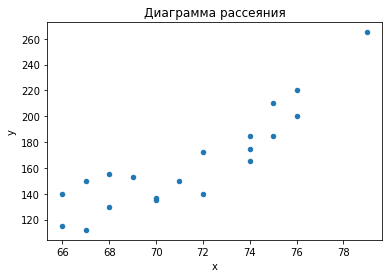

In [13]:
frame.plot.scatter('x', 'y')
plt.title("Диаграмма рассеяния")
plt.show()

## Пункт 2

In [14]:
frame = pd.read_json('data2.json')
print(f"Исходные наборы данных:\n{ frame }")

Исходные наборы данных:
    a   b   c
0  17  11  11
1  17   9   8
2  12  13  19


In [15]:
print(f"Ковариационная матрица:\n{ frame.cov() }")

Ковариационная матрица:
           a     b          c
a   8.333333  -5.0 -15.833333
b  -5.000000   4.0  11.000000
c -15.833333  11.0  32.333333


#### Обобщённая дисперсия
##### Обобщённая дисперсия - это скалярное значение, которое обобщает дисперсию для многомерных случайных величин. Представляет из себя определитель ковариационной матрицы.
##### Формула (коэффициент):
\begin{equation}
    s(x, y) = |H(x, y)|
\end{equation}
, где $H(x, y)$ - ковариационная матрица.

In [16]:
print(f"Обобщённая дисперсия: { det(frame.cov().values) }")

Обобщённая дисперсия: 2.2204460492503156e-14


## Пункт 3

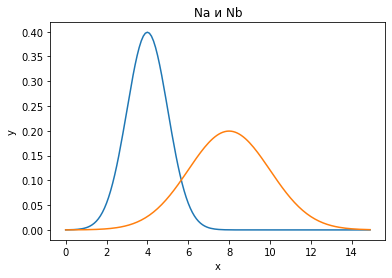

In [17]:
Na = lambda x: normal_distribution(x, 1, 4)
Nb = lambda x: normal_distribution(x, 2, 8)
arr = [x for x in arange(0, 15, 0.1)]

plt.plot(arr, [Na(x) for x in arr], label="Na")
plt.plot(arr, [Nb(x) for x in arr], label="Nb")
plt.legend()
plt.title("Na и Nb")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [18]:
for i in range(5, 8):
    print(f"Значение { i } с большей вероятностью было сгенерировано распределением { 'Na' if max(Na(i), Nb(i)) == Na(i) else 'Nb' }")

Значение 5 с большей вероятностью было сгенерировано распределением Na
Значение 6 с большей вероятностью было сгенерировано распределением Nb
Значение 7 с большей вероятностью было сгенерировано распределением Nb


In [19]:
print(f"Значение, которое могло быть сгенерировано обеими распределениями с равной вероятностью: { fsolve(lambda x: Na(x) - Nb(x), 5.0)[0] }")


Значение, которое могло быть сгенерировано обеими распределениями с равной вероятностью: 5.659909655901637
